In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [38]:
# LOAD DATA

In [39]:
df = pd.read_csv('world-happiness-report-2021.csv')

In [40]:
# CHECK WHAT DATA LOOKS LIKE

In [41]:
df.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [42]:
# CHECK FOR NULL

In [43]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [44]:
# CHECK DATA TYPE

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [46]:
# SEE COLUMNS

In [47]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [48]:
# REMOVE COLUMNS

In [49]:
df.drop(columns=[
    'Standard error of ladder score',
    'upperwhisker',
    'lowerwhisker',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption'
], inplace=True)

In [50]:
# CHECK WHAT COLUMNS ARE LEFT

In [51]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Dystopia + residual'],
      dtype='object')

In [52]:
df['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [53]:
# SCALE

In [54]:
def scale_me(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [55]:
columns_to_scale = [
    'Ladder score', 'Logged GDP per capita',
    'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity',
    'Perceptions of corruption', 'Ladder score in Dystopia',
    'Dystopia + residual'
]

In [56]:
df[columns_to_scale] = scale_me(df[columns_to_scale])

In [57]:
# PLOT DATA

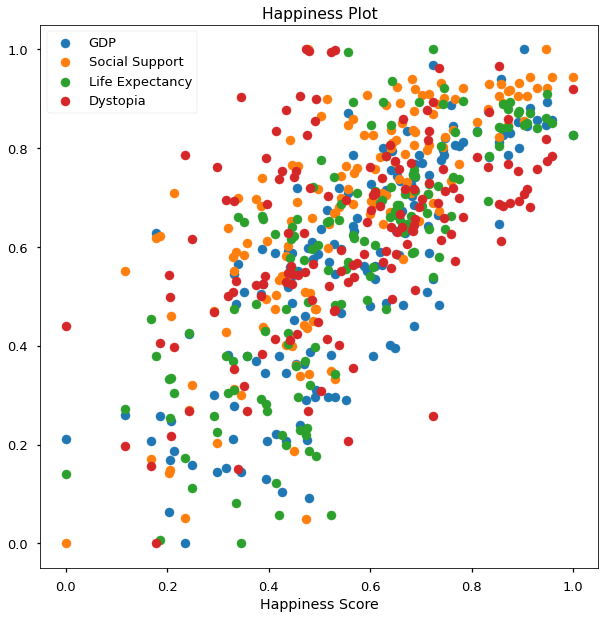

In [65]:
plt.style.use('seaborn-talk')
plt.figure(figsize=(10,10))
plt.scatter(df['Ladder score'], df['Logged GDP per capita'], label='GDP')
plt.scatter(df['Ladder score'], df['Social support'], label='Social Support')
plt.scatter(df['Ladder score'], df['Healthy life expectancy'], label='Life Expectancy')
#plt.scatter(df['Ladder score'], df['Freedom to make life choices'], label='Life choice Freedom')
#plt.scatter(df['Ladder score'], df['Generosity'], label='Generosity')
#plt.scatter(df['Ladder score'], df['Perceptions of corruption'], label='Corruption')
plt.scatter(df['Ladder score'], df['Dystopia + residual'], label='Dystopia')
plt.xlabel('Happiness Score')
plt.title('Happiness Plot')
plt.legend()
plt.show()

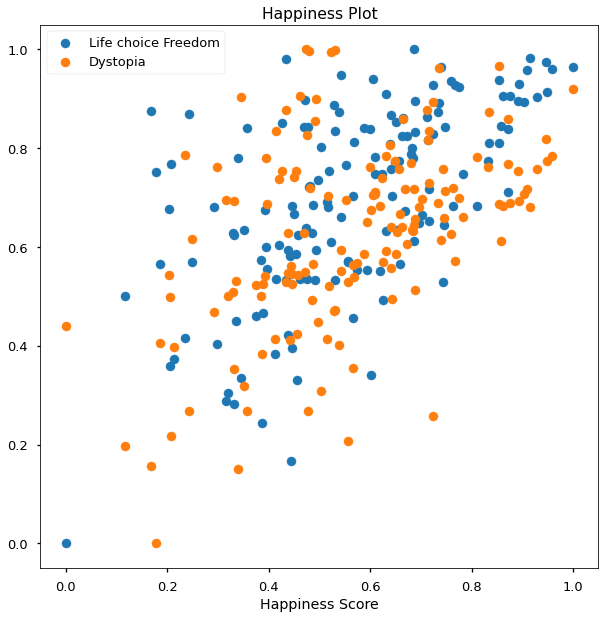

In [70]:
plt.style.use('seaborn-talk')
plt.figure(figsize=(10,10))
# plt.scatter(df['Ladder score'], df['Logged GDP per capita'], label='GDP')
# plt.scatter(df['Ladder score'], df['Social support'], label='Social Support')
# plt.scatter(df['Ladder score'], df['Healthy life expectancy'], label='Life Expectancy')
plt.scatter(df['Ladder score'], df['Freedom to make life choices'], label='Life choice Freedom')
# plt.scatter(df['Ladder score'], df['Generosity'], label='Generosity')
# plt.scatter(df['Ladder score'], df['Perceptions of corruption'], label='Corruption')
plt.scatter(df['Ladder score'], df['Dystopia + residual'], label='Dystopia')
plt.xlabel('Happiness Score')
plt.title('Happiness Plot')
plt.legend()
plt.show()